# Homework 4 and 5 
### Ahmet Buğra Taksuk
### 2017402168

- In this homework, we are asked to develop alternative forecasting strategies for our project data which is the sales data and the related information of nine products of Trendyol at different categories. I'm going to investigate the seasonality for each product at different levels such as daily, weekly or monthly. Then I am going to fit the data into ARIMA model based on my findings about seasonality. Lastly, in the third and in the last task, I will check for external regressors and whether I can use them in my model or not. 

- We decided to work on the project as a group.I am responsible for the last three product in the product list in the project description but I am normally responsible for first three products. We thought that it might be efficient to exchange our products to come up with different and better models. 

- For each data, I used Pandas dataframe for manipulation and matplotlib and seaborn for visualization. Basic manupulations I did were importing data, converting excel data into data frame, changing column name, changing index to time series and  dropping irrelevant information that data set has given. 

- For the ARIMA models and decompositions, I used the statsmodel library.  


# Product 1

# Task 1- Analyzing Seasonality 

## 1 ) Importing and Manipulating the data for the first three product 

- After importing the recent data and deleting unnecessary columns, I changed the event_date column into datetime object to extract month,day,week infromation quickly. Then, I set the event_date column to index to make it time series object. Lastly, I added the month, week and day information as a numeric variable for possiblity of using in future model.

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from datetime import datetime

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pr7 = pd.read_csv("alldata_item7.csv")
pr7.head()

,Unnamed: 0,price,event_date,product_content_id,sold_count,visit_count,favored_count,basket_count,category_sold,category_brand_sold,category_visits,ty_visits,category_basket,category_favored,w_day,Month,weeknumber
0,1,87.14,18/06/2021,85004,57,2144,299,271,2772,286,114848,91784941,14440,15512,Fri,Jun,24
1,2,86.78,17/06/2021,85004,79,2729,538,332,2927,350,117287,102409626,14701,15084,Thu,Jun,24
2,3,87.42,16/06/2021,85004,81,2850,408,336,3154,360,134400,105918459,16617,18419,Wed,Jun,24
3,4,88.08,15/06/2021,85004,78,2989,423,344,3504,389,137894,103541571,17365,19431,Tue,Jun,24
4,5,89.20,14/06/2021,85004,47,2796,458,298,3159,295,139775,107738598,17284,19610,Mon,Jun,24


In [5]:
pr7["event_date"] = pd.to_datetime(pr7["event_date"], format = "%d/%m/%Y") # converting event date into datetime object
pr7['Month'] = pr7['event_date'].dt.month #adding month information as a numeric variable 
pr7.drop('Unnamed: 0',axis='columns', inplace=True)
pr7['Day'] = pr7['event_date'].dt.weekday #adding day information as a numeric variable 
pr7.set_index("event_date" , inplace = True) # setting index time series 
pr7.head()

,price,product_content_id,sold_count,visit_count,favored_count,basket_count,category_sold,category_brand_sold,category_visits,ty_visits,category_basket,category_favored,w_day,Month,weeknumber,Day
event_date,,,,,,,,,,,,,,,,
2021-06-18,87.14,85004,57,2144,299,271,2772,286,114848,91784941,14440,15512,Fri,6,24,4
2021-06-17,86.78,85004,79,2729,538,332,2927,350,117287,102409626,14701,15084,Thu,6,24,3
2021-06-16,87.42,85004,81,2850,408,336,3154,360,134400,105918459,16617,18419,Wed,6,24,2
2021-06-15,88.08,85004,78,2989,423,344,3504,389,137894,103541571,17365,19431,Tue,6,24,1
2021-06-14,89.20,85004,47,2796,458,298,3159,295,139775,107738598,17284,19610,Mon,6,24,0


- For time series analysis, I only deal with the sold amount of the product so I drop possible regressors

In [10]:
sold = pd.DataFrame(pr7.sold_count) 
sold.head()

,sold_count
event_date,
2021-06-18,57
2021-06-17,79
2021-06-16,81
2021-06-15,78
2021-06-14,47


# 2 ) Visualizations 

- At first, since there are some dramatic peaks at some point, I wanted to check whether there is outlier points in the data or not. So I plotted the boxplot of the sold amount data. From the plot, it seems that there are some outlier points. If the model I am going to fit is not explaining those points. I might discard them. 

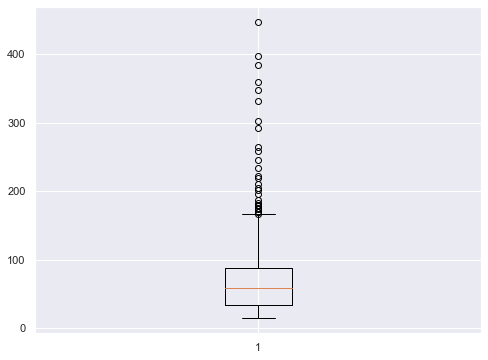

In [27]:
plt.boxplot(sold);

- For initial observation, I plotted the sold_count data over time. At first sight, seasonality component seems to be exist but further examination was needed. So, I used ACF and PACF plots. From ACF, we see that there is a seasonality pattern in the data. 

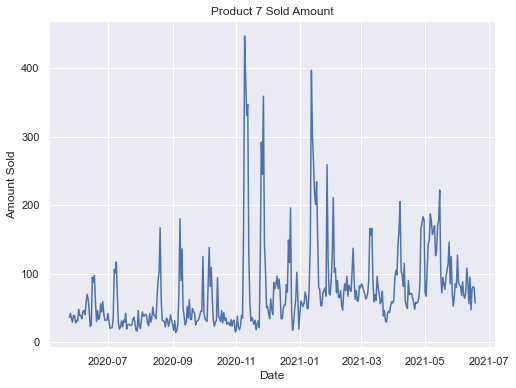

In [16]:
sns.set(rc={'figure.figsize':(8,6)})
plt.title("Product 7 Sold Amount")
plt.xlabel("Date")
plt.ylabel("Amount Sold")
plt.plot(sold)
plt.show();

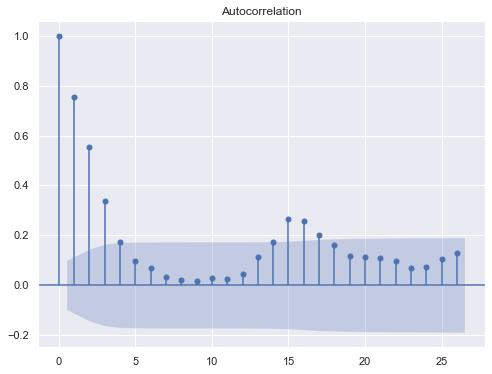

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sold)
plt.show()

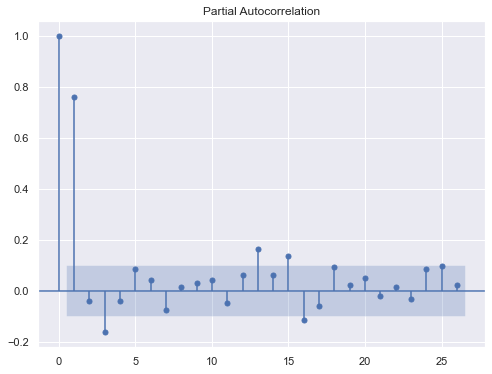

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(sold)
plt.show()

# 3 ) Decomposing the data 

### Weekly Seasonality 

- From the seasonal component, we see that there is pattern occurs every week in the sold amount data. For the trend part, it is hard to say there is a significant trend component. After decomposing the series, random term seemed to have the zero mean assumption which is useful in fitting. 

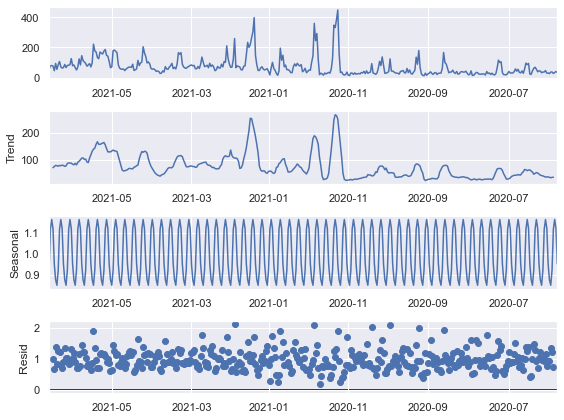

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sold, model='multiplicative', period = 7 ) 
result.plot()
plt.show();

### Monthly Seasonality 

- Wee again see a seasonal component in the monthly decomposition however again it is hard to say that there is clear trend pattern. 

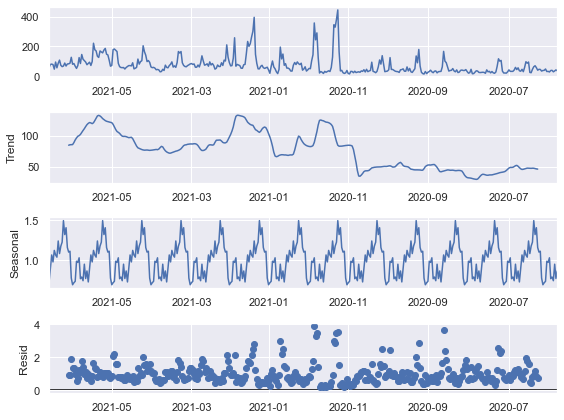

In [51]:
result = seasonal_decompose(sold, model='multiplicative', period = 30 ) 
result.plot()
plt.show();

### Random term after decomposing weekly

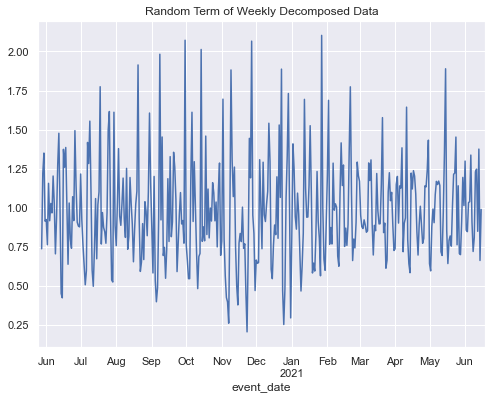

In [57]:
plt.title("Random Term of Weekly Decomposed Data")
result.resid.plot()
plt.show();

### Random term after decomposing monthly

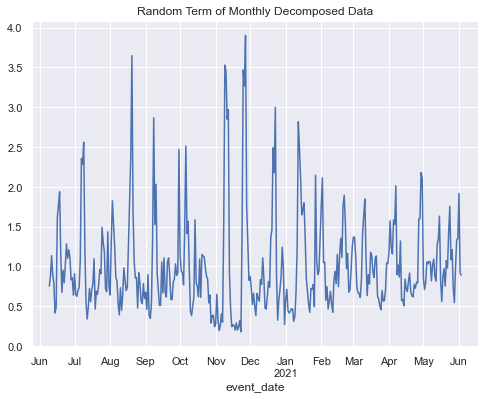

In [52]:
plt.title("Random Term of Monthly Decomposed Data")
result.resid.plot()
plt.show();

## Conclusion 
- Both the monthly and the weekly decompositon seems to have a significant seasonal component but the trend variables are not significant. We might use weekly decompositon as the random term of weekly decomposition seems more like white noise series. 

In [50]:
random = result.resid
trend = result.trend
season = result.seasonal

# Task 2- Fitting data into ARIMA Model

## 1 ) Deciding on the parameters 

- To decide on the parameters of the ARIMA model, I checked the ACF and PACF plots of the data. ACF plot has a exponentially decaying pattern and PACF function has a sudden drop at lag 1 and no significant value after lag 1. So the model suggest a AR(1) model. But I am going to check the neighborhood to find the best model. 

In [74]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(1,0,0))
model_fit = model.fit()
model_fit.aic

218.40685839191656

In [75]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(2,0,0))
model_fit = model.fit()
model_fit.aic

206.20236680279686

In [76]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(3,0,0))
model_fit = model.fit()
model_fit.aic

168.58304774456144

In [77]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(4,0,0))
model_fit = model.fit()
model_fit.aic

166.5287233764691

In [78]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(5,0,0))
model_fit = model.fit()
model_fit.aic

158.11480444172804

In [79]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(6,0,0))
model_fit = model.fit()
model_fit.aic

154.54292525862505

In [80]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(1,0,1))
model_fit = model.fit()
model_fit.aic

216.79824627485934

In [81]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(2,0,1))
model_fit = model.fit()
model_fit.aic

160.36524645231

In [82]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(3,0,1))
model_fit = model.fit()
model_fit.aic

152.27543596967428

In [83]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(4,0,1))
model_fit = model.fit()
model_fit.aic

153.76869379975648

In [85]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(2,0,2))
model_fit = model.fit()
model_fit.aic

152.85075232008083

- So the best model we came up with is the one with (3,0,1) three autoregressive term and one moving average term. 

## 2 ) Fitting the Model 

In [86]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(3,0,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                  390
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 -70.138
Date:                Sat, 19 Jun 2021   AIC                            152.275
Time:                        17:58:30   BIC                            176.072
Sample:                             0   HQIC                           161.709
                                - 390                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9760      0.009    113.498      0.000       0.959       0.993
ar.L1          0.7464      0.087      8.589      0.000       0.576       0.917
ar.L2         -0.2530      0.068     -3.736      0.000      -0.386      -0.120
ar.L3         -0.1891      0.069     -2.756      0.006      -0.324      -0.055
ma.L1         -0.6587      0.073     -9.072      0.000      -0.801      -0.516
sigma2         0.0842      0.005     15.730      0.000       0.074       0.095
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                43.03
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

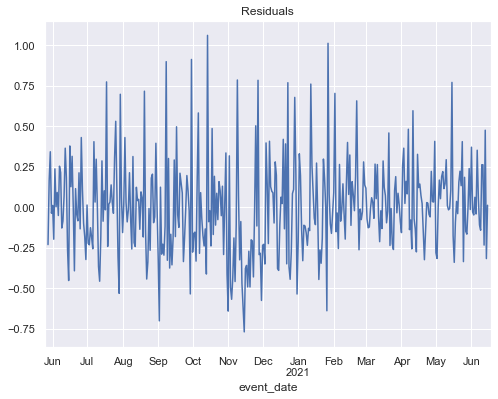

In [93]:
plt.title("Residuals")
model_fit.resid.plot();
plt.show()

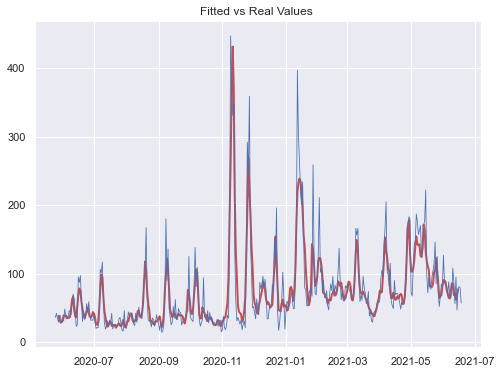

In [90]:
new_df = pd.DataFrame(model_fit.fittedvalues * trend*season,  index = model_fit.fittedvalues.index)
new_df.columns = ["Fitted"]
new_df["Real"] = sold
plt.plot(random.index,new_df.Fitted, c = "r",linewidth=2)
plt.plot(random.index,new_df.Real, c = "b", linewidth=0.8,)
plt.title("Fitted vs Real Values ")
plt.show()

### Comments

- The model seems to have a good fit since zero mean assumption and constant varinace assumption seems to be held but it can be improved adding extra regressors to the model. 

# Task 3 and 4 - Adding external regressors to the model 

## 1 ) Searcing for regressors

- In this part, I am going to look for variables that might be correlated to sold amount and can be used as regressors in the ARIMAX model. To do this, first I am going to use pairplots. But some of the data in the columns are lost for so many data points. So only columns I can use for this, "Basket Count" , "Category Sold" , Category Visits" and "Category Favored". I checked the relation of each variable with the sold count. From the visualizations, Basket Count and Category Favored seems to have a correlation, so I am going to add those variables to the model. 

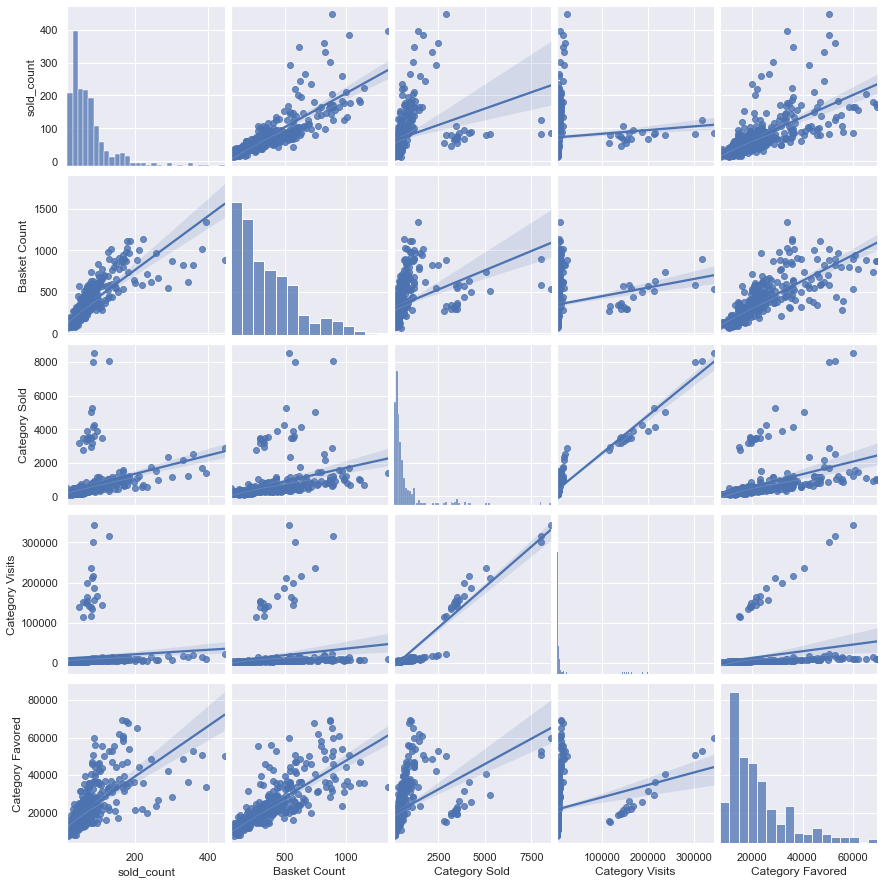

In [101]:
pairplot = pd.DataFrame(pr7["sold_count"])
pairplot["Basket Count"] = pr7["basket_count"]
pairplot["Category Sold"] = pr7["category_sold"]
pairplot["Category Visits"] = pr7["category_visits"]
pairplot["Category Favored"] = pr7["category_favored"]
sns.pairplot(pairplot, kind = "reg");

## 2 ) Adding regressors to the ARIMA model 

- Before creating a regressors matrix, I had to split my data into train and test data so that I can calculate some performance measures. To do that, I am allocating the last seven days as test data and the rest as train data. 

In [124]:
train_data = sold.drop(sold.head(7).index)
train_data.head()

,sold_count
event_date,
2021-06-11,87
2021-06-10,108
2021-06-09,73
2021-06-08,64
2021-06-07,68


In [125]:
test_data = sold.head(7)
test_data.head()

,sold_count
event_date,
2021-06-18,57
2021-06-17,79
2021-06-16,81
2021-06-15,78
2021-06-14,47


In [139]:
regressors = pd.DataFrame(pr7["basket_count"].drop(pr7.head(7).index))
#regressors["Category Favored"] = pr7["category_favored"].drop(pr7.head(7).index)

regressors.head()

,basket_count
event_date,
2021-06-11,577
2021-06-10,571
2021-06-09,363
2021-06-08,322
2021-06-07,298


### Now I need to decompose my train data and fit the model with and without external regressors. 

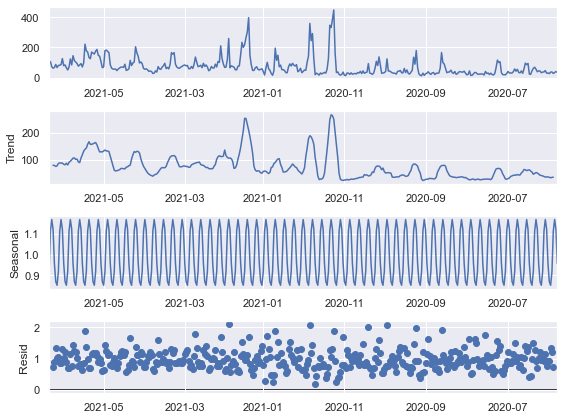

In [150]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_data, model='multiplicative', period = 7 ) 
trend = result.trend
season = result.seasonal
random = result.resid 
result.plot();

### Without regressors

In [151]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(3,0,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                  383
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 -69.463
Date:                Sun, 20 Jun 2021   AIC                            150.927
Time:                        14:43:41   BIC                            174.615
Sample:                             0   HQIC                           160.323
                                - 383                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9753      0.009    112.168      0.000       0.958       0.992
ar.L1          0.7576      0.089      8.554      0.000       0.584       0.931
ar.L2         -0.2632      0.069     -3.793      0.000      -0.399      -0.127
ar.L3         -0.1834      0.070     -2.630      0.009      -0.320      -0.047
ma.L1         -0.6613      0.074     -8.991      0.000      -0.806      -0.517
sigma2         0.0845      0.005     15.578      0.000       0.074       0.095
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                43.85
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### With external regressor

In [152]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(3,0,1), exog = regressors)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                  383
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 -57.092
Date:                Sun, 20 Jun 2021   AIC                            128.184
Time:                        14:43:41   BIC                            155.820
Sample:                             0   HQIC                           139.147
                                - 383                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7856      0.030     26.130      0.000       0.727       0.845
basket_count     0.0005    6.7e-05      7.584      0.000       0.000       0.001
ar.L1            0.1390      0.236      0.588      0.557      -0.325       0.602
ar.L2           -0.0206      0.084     -0.245      0.807      -0.185       0.144
ar.L3           -0.2128      0.057     -3.733      0.000      -0.325      -0.101
ma.L1            0.1209      0.246      0.491      0.623      -0.361       0.603
sigma2           0.0800      0.006     13.585      0.000       0.068       0.091
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                59.51
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.85   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Coefficients of earlier model has been changed, some variables became insignificant. That's probably because some regressors explains each other. I am going to drop the Category Favored column and try to fit the model again.

In [153]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(3,0,1), exog = regressors)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                  383
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 -57.092
Date:                Sun, 20 Jun 2021   AIC                            128.184
Time:                        14:43:43   BIC                            155.820
Sample:                             0   HQIC                           139.147
                                - 383                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7856      0.030     26.130      0.000       0.727       0.845
basket_count     0.0005    6.7e-05      7.584      0.000       0.000       0.001
ar.L1            0.1390      0.236      0.588      0.557      -0.325       0.602
ar.L2           -0.0206      0.084     -0.245      0.807      -0.185       0.144
ar.L3           -0.2128      0.057     -3.733      0.000      -0.325      -0.101
ma.L1            0.1209      0.246      0.491      0.623      -0.361       0.603
sigma2           0.0800      0.006     13.585      0.000       0.068       0.091
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                59.51
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.85   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [154]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(random, order=(3,0,0), exog = regressors)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                  383
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 -57.620
Date:                Sun, 20 Jun 2021   AIC                            127.239
Time:                        14:43:45   BIC                            150.928
Sample:                             0   HQIC                           136.636
                                - 383                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7856      0.028     27.694      0.000       0.730       0.841
basket_count     0.0005   6.38e-05      7.903      0.000       0.000       0.001
ar.L1            0.2598      0.054      4.797      0.000       0.154       0.366
ar.L2           -0.0547      0.055     -1.002      0.316      -0.162       0.052
ar.L3           -0.1993      0.056     -3.586      0.000      -0.308      -0.090
sigma2           0.0798      0.006     13.607      0.000       0.068       0.091
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                60.91
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.87   Skew:                             0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Comments 
- So overall model has improved with the external regressor Basket Count. But the AR(2) term has become insignificant. I am going to continue with this model. 

## Forecasting and model performance measures 

#### Coefficients of earlier model has been changed, some variables became insignificant. That's probably because some regressors explains each other. I am going to drop the Category Favored column and try to fit the model again.

In [171]:
forecast = model_fit.forecast(steps = 7, exog = pr7["basket_count"].head(7))

In [173]:
trend = trend.fillna(79.428571)  #this value is the last trend value so I filled NA values with the last trend value 
trend_comp = trend.tail(7).values
season_comp = season.tail(7).values

In [174]:
forecast_normalized = forecast.values*trend_comp*season_comp

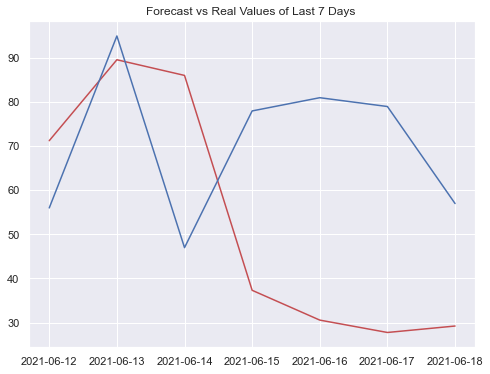

In [175]:
plt.plot(test_data.index,forecast_normalized, c = "r")
plt.plot(test_data.index,test_data, c = "b")
plt.title("Forecast vs Real Values of Last 7 Days ")
plt.show()

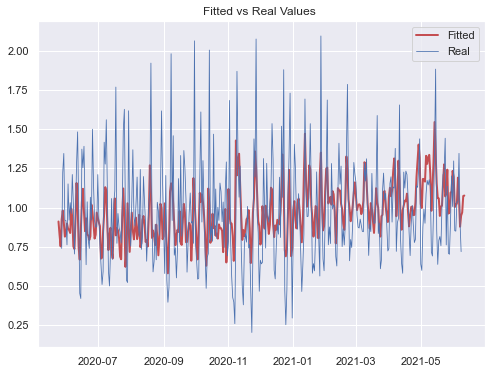

In [176]:
new_df = pd.DataFrame(model_fit.fittedvalues,  index = model_fit.fittedvalues.index)
new_df.columns = ["Fitted"]
new_df["Real"] = random
plt.plot(train_data.index,new_df.Fitted, c = "r",linewidth=2, label = "Fitted")
plt.plot(train_data.index,new_df.Real, c = "b", linewidth=0.8, label = "Real")
plt.title("Fitted vs Real Values ")
plt.legend()
plt.show()

## Conclusion 
### Overall looking the model, I would definetely go with an LM model as I did in the project becuase external regressors are covering the variance highly as opposed to the ARIMA model. 